In [1]:
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv", sep=";")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape

(9865, 14)

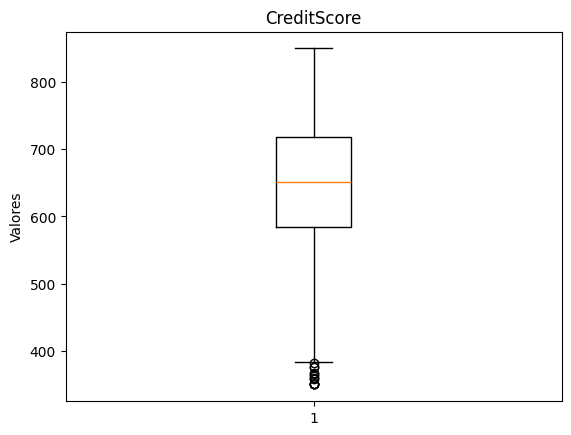

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot, mostrando a distribuição dos valores na coluna 'CreditScore'
plt.boxplot(df['CreditScore'])
plt.title('CreditScore')
plt.ylabel('Valores')
plt.show()

In [4]:
print(df['CreditScore'].min())
print(df['CreditScore'].max())

350
850


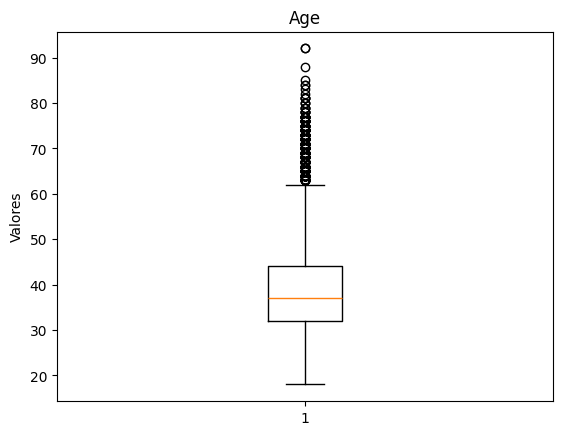

In [5]:
# Criar o gráfico de boxplot
plt.boxplot(df['Age'])
plt.title('Age')
plt.ylabel('Valores')
plt.show()

In [6]:
print(df['Age'].min())
print(df['Age'].max())

18
92


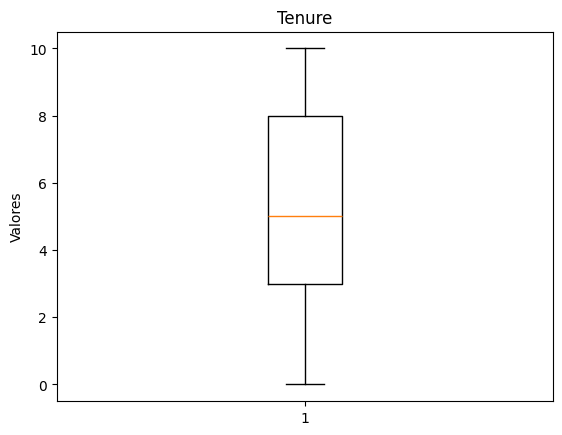

In [7]:
# Criar o gráfico de boxplot
plt.boxplot(df['Tenure'])
plt.title('Tenure')
plt.ylabel('Valores')
plt.show()

In [8]:
print(df['Tenure'].min())
print(df['Tenure'].max())

0
10


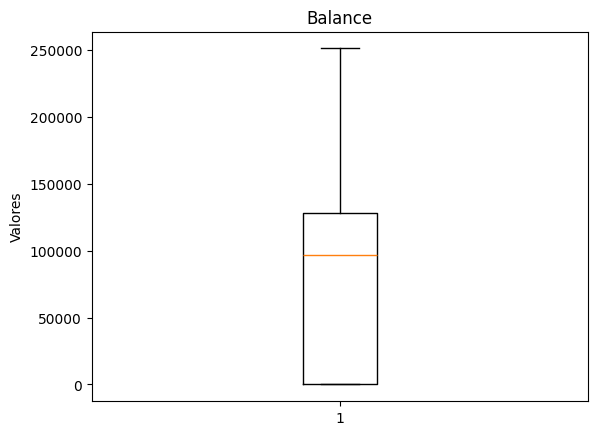

In [9]:
# Criar o gráfico de boxplot
plt.boxplot(df['Balance'])
plt.title('Balance')
plt.ylabel('Valores')
plt.show()

In [10]:
print(df['Balance'].min())
print(df['Balance'].max())

0.0
250898.09


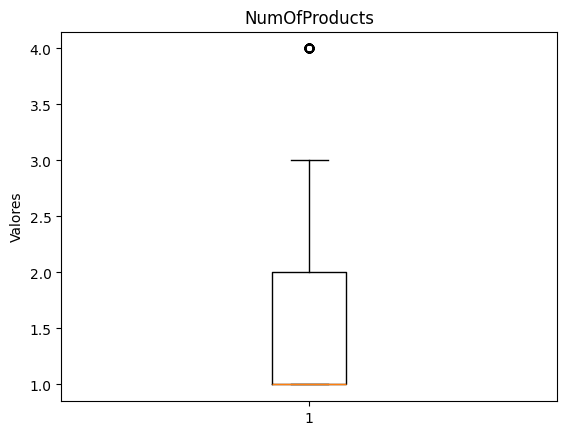

In [11]:
# Criar o gráfico de boxplot
plt.boxplot(df['NumOfProducts'])
plt.title('NumOfProducts')
plt.ylabel('Valores')
plt.show()

In [12]:
print(df['NumOfProducts'].min())
print(df['NumOfProducts'].max())

1
4


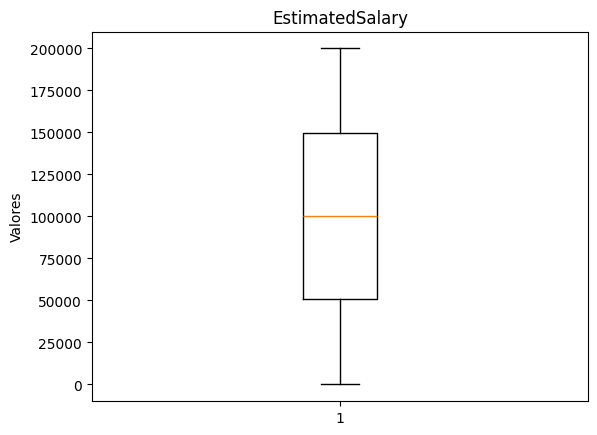

In [13]:
# Criar o gráfico de boxplot
plt.boxplot(df['EstimatedSalary'])
plt.title('EstimatedSalary')
plt.ylabel('Valores')
plt.show()

In [14]:
print(df['EstimatedSalary'].min())
print(df['EstimatedSalary'].max())

11.58
199992.48


In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
df['Surname'] = label_encoder.fit_transform(df['Surname'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1111,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1173,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2032,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1816,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited']) # Variáveis características
y = df['Exited'] # O que eu quero prever. (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(X_train)

x_train_min_max_scaled = scaler.transform(X_train)
x_test_min_max_scaled= scaler.transform(X_test)
x_train_min_max_scaled

array([[0.35201121, 0.11669547, 0.88507719, ..., 1.        , 0.        ,
        0.34768845],
       [0.60456274, 0.78062996, 0.35849057, ..., 1.        , 0.        ,
        0.46923837],
       [0.89393636, 0.07744496, 0.17495712, ..., 0.        , 1.        ,
        0.56001428],
       ...,
       [0.53922353, 0.03258209, 0.5626072 , ..., 0.        , 0.        ,
        0.46092526],
       [0.08595157, 0.96788994, 0.59691252, ..., 1.        , 0.        ,
        0.48738065],
       [0.7273364 , 0.56228399, 0.84425386, ..., 1.        , 1.        ,
        0.26761502]], shape=(7892, 13))

In [21]:
scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

scaler.fit(X_train)# qual média e std será utilizado para o escalonamento

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)
x_train_standard_scaled

array([[-0.50073964, -1.33102082,  1.28295781, ...,  0.64920701,
        -1.04034701, -0.53624445],
       [ 0.38340744,  0.98483691, -0.54107698, ...,  0.64920701,
        -1.04034701, -0.11539063],
       [ 1.39646344, -1.46792981, -1.17681548, ..., -1.54034073,
         0.96121774,  0.19891141],
       ...,
       [ 0.15466416, -1.62441517,  0.16595931, ..., -1.54034073,
        -1.04034701, -0.1441739 ],
       [-1.43217667,  1.63801503,  0.28478893, ...,  0.64920701,
        -1.04034701, -0.05257492],
       [ 0.81322062,  0.22322832,  1.14155055, ...,  0.64920701,
         0.96121774, -0.81349026]], shape=(7892, 13))

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')


Acurácia: 0.76


In [ ]:
# Testando com a normalização

model_min_max = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model_min_max.fit(x_train_min_max_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_min_max = model.predict(x_test_min_max_scaled)

accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
print(f'Acurácia: {accuracy_min_max:.2f}')

Acurácia: 0.81


c:\Users\aninh\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
# Testando com a padronização

model_standard = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model_standard.fit(x_train_standard_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_standard = model.predict(x_test_standard_scaled)

accuracy_strandard = accuracy_score(y_test, y_pred_standard)
print(f'Acurácia: {accuracy_strandard:.2f}')

Acurácia: 0.81


c:\Users\aninh\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
